In [2]:
# importing required files
import time
import sys
import random
import numpy as np
from register.QuantumRegister import *
from register.grovers import *
from register.deutsch import * 
from register.deutschJozsa import * 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

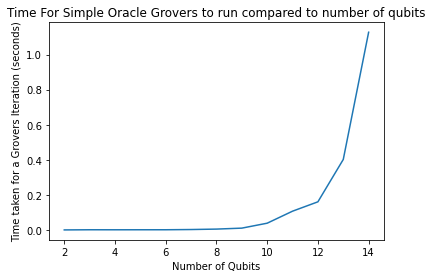

In [8]:
# Finds the time taken for grovers algorithm based on number of qubits in the register 
arr = np.arange(2, 15, dtype = int)
times = []
for i in arr:
    t1 = time.time()
    rand_list = np.arange(2**i)
    target = np.random.randint(2**i - 1)
    def oracle(register):
        register.state_[target] *= -1
        return register.state_
    reg = QuantumRegister(int(i))
    grover = Grovers(oracle, rand_list, reg)
    grover.groversAlgorithm()
    t2 = time.time()
    times.append(t2-t1)


plt.plot(arr, times, "-")
plt.xlabel("Number of Qubits")
plt.ylabel("Time taken for a Grovers Iteration (seconds)")
plt.title("Time For Simple Oracle Grovers to run compared to number of qubits")
#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()


In [9]:
# balanced oracle function
def balanced(register):
    def oracle(a):
	    return a%2
    for i in range(register.n_states_):
	    register.state_[i] *= (-1) ** oracle(i)
    return register.state_

#constant oracle function
def constant(register):
	def oracle(a):
		return 0
	for i in range(register.n_states_):
		register.state_[i] *= (-1) ** oracle(i)
	return register.state_

# Finds the time taken for Deutsch algorithm based on the oracle function
def deutschTimeElapsed():
	register = QuantumRegister(2)

	deutschBalanced = Deutsch(balanced, register)
	timeInit = time.time()
	is_balanced_one = deutschBalanced.deutschAlgorithm()
	timeBalanced = time.time() - timeInit

	register = QuantumRegister(2)
	
	deutschConstant = Deutsch(constant, register)
	timeInit = time.time()
	is_balanced_two = deutschConstant.deutschAlgorithm()
	timeConstant = time.time() - timeInit

	return timeBalanced + timeConstant
	

	
print(deutschTimeElapsed())

0.002917051315307617


In [10]:
# balanced oracle
def balanced(register):
	
    def oracle(a):
	    return a%2
	
	
    for i in range(register.n_states_):
	    register.state_[i] *= (-1) ** oracle(i)
    
    return register.state_

#constant oracle function
def constant(register):
	def oracle(a):
		return 0
	for i in range(register.n_states_):
		register.state_[i] *= (-1) ** oracle(i)
	return register.state_

def dJTimeElapsed(n_qubits):
	# This function is used to run the deutsch algorithm, it uses examples for both balanced and constant functions
	# The deutsch algorithm is used to evaluate a black box algorithm using a basic quantum circuit, for all constant 
	# functions our implementation will produce a 0 and for all balanced, a 1

	register = QuantumRegister(n_qubits)

	dJBalanced = DeutschJozsa(balanced,register)
	timeInit = time.time()
	is_balanced_one = dJBalanced.deutschJozsaAlgorithm()
	timeBalanced = time.time() - timeInit

	register = QuantumRegister(n_qubits)
	
	dJConstant = DeutschJozsa(constant,register)
	timeInit = time.time()
	is_balanced_two = dJConstant.deutschJozsaAlgorithm()
	timeConstant = time.time() - timeInit

	return timeBalanced + timeConstant


2 QUBIT INIT DJ
Time elapsed 0.002909421920776367

3 QUBIT INIT DJ
Time elapsed 0.003002643585205078

4 QUBIT INIT DJ
Time elapsed 0.00422215461730957

5 QUBIT INIT DJ
Time elapsed 0.004134654998779297

6 QUBIT INIT DJ
Time elapsed 0.00669550895690918

7 QUBIT INIT DJ
Time elapsed 0.008594512939453125

8 QUBIT INIT DJ
Time elapsed 0.017617464065551758

9 QUBIT INIT DJ
Time elapsed 0.030852794647216797

10 QUBIT INIT DJ
Time elapsed 0.05336475372314453

11 QUBIT INIT DJ
Time elapsed 0.12213659286499023

12 QUBIT INIT DJ
Time elapsed 0.29126691818237305

13 QUBIT INIT DJ
Time elapsed 0.6349587440490723

14 QUBIT INIT DJ
Time elapsed 1.0544800758361816

15 QUBIT INIT DJ
Time elapsed 2.4762208461761475

16 QUBIT INIT DJ
Time elapsed 5.014905214309692

17 QUBIT INIT DJ
Time elapsed 10.994085550308228

18 QUBIT INIT DJ
Time elapsed 23.274794101715088

19 QUBIT INIT DJ
Time elapsed 49.135623931884766

20 QUBIT INIT DJ
Time elapsed 108.5778636932373



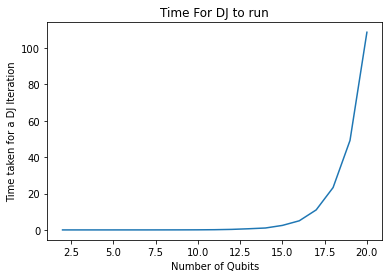

In [13]:
# code to plot the time taken for the Deutsch Jozsa algorithm to run based on the number of qubits

qubitMin = 2
qubitMax = 20
timeLimit = 600

qubitList = list(range(qubitMin,qubitMax+1))
timeElapsed = list(range(qubitMin,qubitMax+1))

for i in range(len(qubitList)):
    n_qubits = qubitList[i]
    print(n_qubits,"QUBIT INIT DJ")
    timeElapsed[i] = dJTimeElapsed(n_qubits)
    print("Time elapsed",timeElapsed[i])
    print()
    if timeElapsed[i] > timeLimit:
        break
plt.plot(qubitList, timeElapsed, "-")
plt.xlabel("Number of Qubits")
plt.ylabel("Time taken for a DJ Iteration")
plt.title("Time For DJ to run")
#plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

In [14]:
# code to plot the time taken for the Grovers algorithm to run based on the number of qubits
	
def groversTimeElapsed(n_qubits):

    listLength = int(2**n_qubits)
    groverList = np.zeros(listLength)
    assert n_qubits == int(np.ceil(np.log2(listLength)))

    target = random.randint(0,listLength-1)
    register = QuantumRegister(n_qubits)

    def groverOracle(register):

      def oracle(a):
        bit = 0
        if a == target:
          bit = 1
        return bit
		
      for i in range(register.n_states_):
        register.state_[i] *= (-1) ** oracle(i)
      return register.state_
    
    startTime = time.process_time()
    result = Grovers(groverOracle, groverList, register)
    result.groversAlgorithm()
    timeElapsed = time.process_time() - startTime
    return timeElapsed

2 QUBIT INIT GROVERS
Time elapsed 0.0007081999999627442

3 QUBIT INIT GROVERS
Time elapsed 0.0007420000000024629

4 QUBIT INIT GROVERS
Time elapsed 0.0010246999999594664

5 QUBIT INIT GROVERS
Time elapsed 0.0016267999999968197

6 QUBIT INIT GROVERS
Time elapsed 0.002382099999977072

7 QUBIT INIT GROVERS
Time elapsed 0.010509300000023813

8 QUBIT INIT GROVERS
Time elapsed 0.008479000000022552

9 QUBIT INIT GROVERS
Time elapsed 0.021317199999998593

10 QUBIT INIT GROVERS
Time elapsed 0.048753999999973985

11 QUBIT INIT GROVERS
Time elapsed 0.13747150000000374

12 QUBIT INIT GROVERS
Time elapsed 0.3117424000000142

13 QUBIT INIT GROVERS
Time elapsed 0.8194194999999809

14 QUBIT INIT GROVERS
Time elapsed 2.1767381999999884

15 QUBIT INIT GROVERS
Time elapsed 5.542623800000001

16 QUBIT INIT GROVERS
Time elapsed 15.475285399999962

17 QUBIT INIT GROVERS
Time elapsed 40.17588549999999

18 QUBIT INIT GROVERS
Time elapsed 182.38096569999993



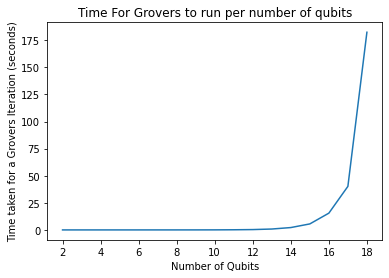

In [15]:
# code to calculate and plot the time taken for the Grovers algorithm to run based on the number of qubits

qubitMin = 2
qubitMax = 18
timeLimit = 600

qubitList = list(range(qubitMin,qubitMax+1))
timeElapsed = list(range(qubitMin,qubitMax+1))

for i in range(len(qubitList)):
    n_qubits = qubitList[i]
    print(n_qubits,"QUBIT INIT GROVERS")
    timeElapsed[i] = groversTimeElapsed(n_qubits)
    print("Time elapsed",timeElapsed[i])
    print()
    if timeElapsed[i] > timeLimit:
        break
plt.plot(qubitList, timeElapsed, "-")
plt.xlabel("Number of Qubits")
plt.ylabel("Time taken for a Grovers Iteration (seconds)")
plt.title("Time For Grovers to run per number of qubits")
plt.show()

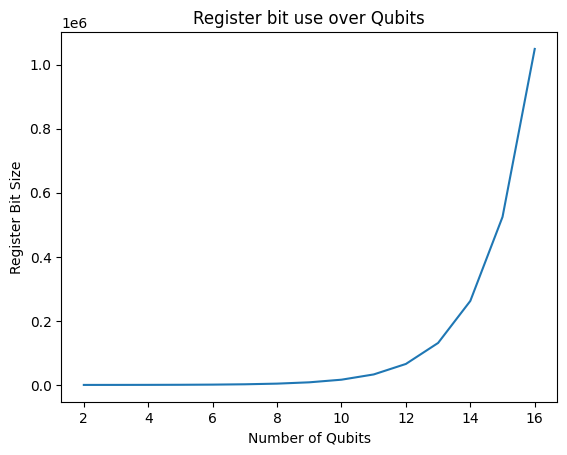

In [ ]:
# code to plot the time taken for the Deutsch algorithm to run based on the number of qubits

def registerBitSize(n_qubits):
    register = QuantumRegister(n_qubits)
    return sys.getsizeof(register.state_)

qubitMin = 2
qubitMax = 16

qubitList = list(range(qubitMin,qubitMax+1))
qubitMemorySize = list(range(qubitMin,qubitMax+1))

for i in range(len(qubitMemorySize)):
    n_qubits = qubitList[i]
    qubitMemorySize[i] = registerBitSize(n_qubits)

plt.plot(qubitList, qubitMemorySize, "-")
plt.xlabel("Number of Qubits")
plt.ylabel("Register Bit Size")
plt.title("Register bit use over Qubits")
plt.show()